In [1]:
from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
#print first training example
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
#print first training label
train_labels[0]

1

In [5]:
#Note that we restricted ourself to the top 10,000 most frequently used words
max([max(sequence) for sequence in train_data])

9999

In [6]:
#Now, let's decode a training example:
word_index = imdb.get_word_index() #this is a dictionary mapping from words to integers
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) #Reverses the mapping from integers to words
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]]) #Decodes the review. The first 3 indeces
                            #not words because 0, 1, and 2 are reserved for padding, start of sequence, and unkown respectively.
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [7]:
#now, let's convert our lists into vectors of 0's and 1's with length 10,000. (This is called one hot encoding)
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) #creates an all zero matrix of shape (len(sequences), dimension)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. #sets specific indeces of results[i] to 1s
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
#here is what a sample would look like now
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [9]:
#let us now also vectorize our labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

y_train[0]

1.0

In [10]:
#Tell tensorflow not to destroy my GPU (it won't destroy it, but it will take the GPU away from your display)
import keras

import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

In [11]:
#Now, let us define our model
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(1, activation='sigmoid', input_shape = (10000,)))
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [12]:
#Now, let us set aside 10,000 examples to test our accuracy on (this is called a validation set),
            #and use the rest to train our model.
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [13]:
x_train.shape

(25000, 10000)

In [14]:
x_val.shape

(10000, 10000)

In [15]:
partial_x_train.shape

(15000, 10000)

In [16]:
history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 1, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 21s 1ms/step - loss: 0.3767 - acc: 0.8438 - val_loss: 0.3082 - val_acc: 0.8753
Epoch 2/20
15000/15000 [==============================] - 20s 1ms/step - loss: 0.2919 - acc: 0.8907 - val_loss: 0.3171 - val_acc: 0.8826
Epoch 3/20
15000/15000 [==============================] - 20s 1ms/step - loss: 0.2896 - acc: 0.9009 - val_loss: 0.3376 - val_acc: 0.8879
Epoch 4/20
15000/15000 [==============================] - 20s 1ms/step - loss: 0.2944 - acc: 0.9069 - val_loss: 0.3609 - val_acc: 0.8896
Epoch 5/20
15000/15000 [==============================] - 20s 1ms/step - loss: 0.3027 - acc: 0.9105 - val_loss: 0.3849 - val_acc: 0.8904
Epoch 6/20
15000/15000 [==============================] - 21s 1ms/step - loss: 0.3100 - acc: 0.9136 - val_loss: 0.4009 - val_acc: 0.8914
Epoch 7/20
15000/15000 [==============================] - 22s 1ms/step - loss: 0.3143 - acc: 0.9154 - val_loss: 0.4206 - val_acc

In [17]:
#model.fit returns something called a history object. this object has a member history, which is the dictionary
#        containing everything that happened during training.
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

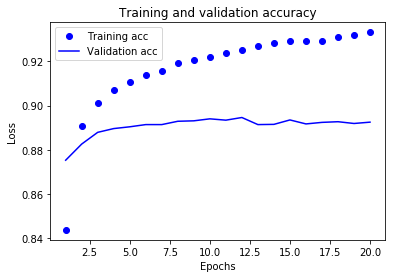

In [20]:
import matplotlib.pyplot as plt

plt.clf() #this clears the figure
#acc = history.history['acc']

epochs = range(1, len(acc) + 1)
acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [21]:
#Test our model
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 3s 109us/step


In [22]:
results

[0.6048361841449141, 0.88468]

In [23]:
#We can use our model to predict how likely a review is positive or negative
model.predict(x_test)

array([[4.2443626e-04],
       [1.0000000e+00],
       [9.9999976e-01],
       ...,
       [8.3853833e-05],
       [6.9807668e-04],
       [9.3634653e-01]], dtype=float32)